# 🧩 1.7 – Laboratorio: Reto Global de Expresiones Regulares

Aplicarás todas las técnicas vistas:
- Búsqueda y coincidencias (`findall`)
- Grupos y cuantificadores
- Validaciones (`match`, `fullmatch`)
- Reemplazos (`sub`, funciones dinámicas`)

---
## 🎯 Objetivo
Procesar un registro de logs simulados con **usuarios, emails, fechas y errores**, limpiarlos y generar un resumen estructurado.

Resultados esperados:
- Lista de usuarios válidos
- Fechas normalizadas
- Emails anonimizados
- Conteo de errores

---
## 🧰 Dataset inicial

```text
[2025-10-31 09:10] user=ana EMAIL=ana@gmail.com ERROR=0
[2025-10-31 09:15] user=luis EMAIL=luis@hotmail.com ERROR=1
[2025/10/31 09:20] user=MARÍA EMAIL=invalid_email ERROR=0
[2025-10-31 09:25] user=pepe EMAIL=pepe@empresa.es ERROR=1
[2025-10-31 09:40] user=SOFIA EMAIL=sofia@data.es ERROR=2
[2025-10-31 10:00] user=juan EMAIL=juan@@example.com ERROR=1
```

In [1]:
logs = '''[2025-10-31 09:10] user=ana EMAIL=ana@gmail.com ERROR=0\n
[2025-10-31 09:15] user=luis EMAIL=luis@hotmail.com ERROR=1\n
[2025/10/31 09:20] user=MARÍA EMAIL=invalid_email ERROR=0\n
[2025-10-31 09:25] user=pepe EMAIL=pepe@empresa.es ERROR=1\n
[2025-10-31 09:40] user=SOFIA EMAIL=sofia@data.es ERROR=2\n
[2025-10-31 10:00] user=juan EMAIL=juan@@example.com  ERROR=1'''

In [2]:
logs

'[2025-10-31 09:10] user=ana EMAIL=ana@gmail.com ERROR=0\n\n[2025-10-31 09:15] user=luis EMAIL=luis@hotmail.com ERROR=1\n\n[2025/10/31 09:20] user=MARÍA EMAIL=invalid_email ERROR=0\n\n[2025-10-31 09:25] user=pepe EMAIL=pepe@empresa.es ERROR=1\n\n[2025-10-31 09:40] user=SOFIA EMAIL=sofia@data.es ERROR=2\n\n[2025-10-31 10:00] user=juan EMAIL=juan@@example.com  ERROR=1'

## 1️⃣ Limpieza inicial

1. Sustituye `/` por `-` en las fechas.
2. Convierte todo el texto a minúsculas.
3. Elimina espacios repetidos.

👉 Usa `re.sub()` y valida con `assert`.

In [3]:
import re

**Sintaxis assert**

assert condicion, "Mensaje de error opcional"

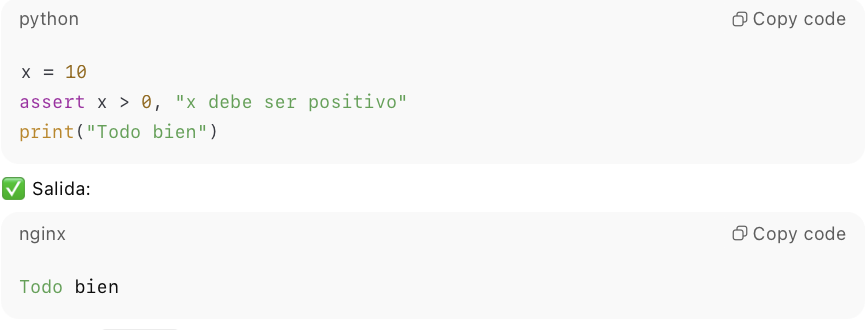

**Si no se cumple la condición dentro del "assert", no continúa el código**

In [4]:
# Copia para no sobreescribir
copia_logs = logs

# Sustituye "/" por "-" en las fechas
logs_limpio = re.sub(r'/', '-', copia_logs)
assert '/' not in logs_limpio, "Quedan '/' en el texto"
print("Texto libre de '/'")

# Convierte todo el texto a minúsculas
logs_limpio = copia_logs.lower()
assert logs_limpio.islower(), "Quedan mayúsculas en el texto"
print("Texto todo en minúsculas")

# Elimina espacios repetidos
logs_limpio = re.sub(r'\s+', " ", logs_limpio)
assert not re.search(r'\s{2,}', logs_limpio), "Quedan espacios múltiples en el texto"
print("Texto libre de espacios múltiples")

print("\n ✅ Texto limpio:", logs_limpio)


Texto libre de '/'
Texto todo en minúsculas
Texto libre de espacios múltiples

 ✅ Texto limpio: [2025-10-31 09:10] user=ana email=ana@gmail.com error=0 [2025-10-31 09:15] user=luis email=luis@hotmail.com error=1 [2025/10/31 09:20] user=maría email=invalid_email error=0 [2025-10-31 09:25] user=pepe email=pepe@empresa.es error=1 [2025-10-31 09:40] user=sofia email=sofia@data.es error=2 [2025-10-31 10:00] user=juan email=juan@@example.com error=1


***Solución propuesta***

In [5]:
import re

# TODO: Aplica las tres transformaciones sobre logs
texto = logs  # copia de trabajo
# texto = ...
texto = re.sub(r'/','-',texto)
texto = texto.lower()
texto = re.sub(r'\s+', ' ',texto)
print(texto[:120])

[2025-10-31 09:10] user=ana email=ana@gmail.com error=0 [2025-10-31 09:15] user=luis email=luis@hotmail.com error=1 [202


In [6]:
# Tests de limpieza
assert '/' not in texto, '❌ Aún quedan fechas con /'
assert texto == texto.lower(), '❌ No está en minúsculas'
assert '  ' not in texto, '❌ Hay dobles espacios'
print('✅ Limpieza inicial correcta.')

✅ Limpieza inicial correcta.


💡 **Tip:**  
- `re.sub(r'/', '-', texto)` reemplaza las barras.
- `texto.lower()` convierte todo a minúsculas.
- `re.sub(r'\s+', ' ', texto)` elimina espacios múltiples.

✅ **Solución explicada:** tres transformaciones encadenadas para homogeneizar el texto antes de procesar.

## 2️⃣ Extracción de campos con grupos

Crea una expresión regular con grupos nombrados:
- `fecha`
- `user`
- `email`
- `error`

💡 Usa la sintaxis `(?P<nombre>...)`.

In [7]:
# TODO: completa el patrón
patron = r'\[(?P<fecha>\d{4}-\d{2}-\d{2} \d{2}:\d{2})\]\s+user=(?P<user>[^\s]+)\s+email=(?P<email>[^\s]+)\s+error=(?P<error>\d+)'

iterador  = re.finditer(patron, logs_limpio)
'''
Iterador de objetos Match. Cada objeto representa una coincidencia individual del patrón dentro del texto.
A diferencia de re.findall(), re.finditer() da la información completa de cada coincidencia (m.group(), m.groupdict(),
m.start(), m.end(), etc.)
'''

coincidencias = []

for match in iterador:
    coincidencias.append(match.groupdict())

(coincidencias)

[{'fecha': '2025-10-31 09:10',
  'user': 'ana',
  'email': 'ana@gmail.com',
  'error': '0'},
 {'fecha': '2025-10-31 09:15',
  'user': 'luis',
  'email': 'luis@hotmail.com',
  'error': '1'},
 {'fecha': '2025-10-31 09:25',
  'user': 'pepe',
  'email': 'pepe@empresa.es',
  'error': '1'},
 {'fecha': '2025-10-31 09:40',
  'user': 'sofia',
  'email': 'sofia@data.es',
  'error': '2'},
 {'fecha': '2025-10-31 10:00',
  'user': 'juan',
  'email': 'juan@@example.com',
  'error': '1'}]

In [8]:
len(coincidencias)

5

El atributo **groupdict()** dentro de un objeto Match devuelve un diccionario de los grupos con nombre por cada coincidencia que encuentre en el texto.

In [9]:
# Test extracción
assert len(coincidencias) == 6, f"❌ Se esperaban 6 coincidencias y hay {len(coincidencias)}"
for c in coincidencias:
    assert set(c.keys()) == {'fecha','user','email','error'}, '❌ Faltan campos en los grupos'
print('✅ Extracción correcta.')

AssertionError: ❌ Se esperaban 6 coincidencias y hay 5

💡 **Tip:**  `\[(?P<fecha>\d{4}-\d{2}-\d{2})[^]]*\] user=(?P<user>\w+) email=(?P<email>[\w@\.]+) error=(?P<error>\d+)`

✅ **Solución explicada:** los grupos capturan cada campo usando nombres y cuantificadores precisos.

## 3️⃣ Validación de emails

Filtra solo los registros con emails válidos usando:
```regex
^[\w\.-]+@[\w\.-]+\.\w+$
```

In [10]:
coincidencias

[{'fecha': '2025-10-31 09:10',
  'user': 'ana',
  'email': 'ana@gmail.com',
  'error': '0'},
 {'fecha': '2025-10-31 09:15',
  'user': 'luis',
  'email': 'luis@hotmail.com',
  'error': '1'},
 {'fecha': '2025-10-31 09:25',
  'user': 'pepe',
  'email': 'pepe@empresa.es',
  'error': '1'},
 {'fecha': '2025-10-31 09:40',
  'user': 'sofia',
  'email': 'sofia@data.es',
  'error': '2'},
 {'fecha': '2025-10-31 10:00',
  'user': 'juan',
  'email': 'juan@@example.com',
  'error': '1'}]

In [13]:
range(0, len(coincidencias))

range(0, 5)

In [11]:
coincidencias[0]['email']

'ana@gmail.com'

In [15]:
patron_email = r'^[\w\.-]+@[\w\.-]+\.\w+$'
validos = []

for i in range(0, len(coincidencias)):
    if re.fullmatch(patron_email, coincidencias[i]['email']):
        validos.append(coincidencias[i]['email'])

print(validos)

['ana@gmail.com', 'luis@hotmail.com', 'pepe@empresa.es', 'sofia@data.es']


In [16]:
# TODO: Filtra los registros válidos
# patron_email = r'^[\w\.-]+@[\w\.-]+\.\w+$'

# validos = [re.fullmatch(patron_email, logs_limpio['email'])]

print(f'Emails válidos: {len(validos)} / {len(coincidencias)}')

Emails válidos: 4 / 5


In [17]:
# Test emails válidos
assert len(validos) == 4, f"❌ Se esperaban 4 emails válidos y hay {len(validos)}"
assert all('email' in v for v in validos), '❌ Falta campo email'
print('✅ Validación de emails correcta.')

AssertionError: ❌ Falta campo email

💡 **Tip:**  `validos = [r for r in coincidencias if re.fullmatch(patron_email, r['email'])]`

✅ **Solución explicada:** se valida con `re.fullmatch`, garantizando coincidencia exacta en todo el string.

## 4️⃣ Anonimización de emails

Reemplaza el nombre antes del `@` por `[anon]`.

Ejemplo: `ana@gmail.com` → `[anon]@gmail.com`

### EJEMPLO PARA EMAILS SUELTOS, NO EN TEXTO

In [20]:
# TODO: función de reemplazo
def anonimizar_email(match):
    return re.sub(r'([^@]+)(@.+)', r'[anon]\2', match)

In [23]:
emails_anonimos = [anonimizar_email(email) for email in validos]
print(emails_anonimos)

['[anon]@gmail.com', '[anon]@hotmail.com', '[anon]@empresa.es', '[anon]@data.es']


### EJEMPLO PARA EMAILS DENTRO DE UN TEXTO

In [28]:
# # TODO: función de reemplazo
# def anonimizar_email(match):
#     return re.sub(r'([^@]+)(@.+)', r'[anon]\2', match)

texto_anon = re.sub(
    r'([\w\.-]+)@([\w\.-]+)',
    lambda match: '[anon]@' + match.group(2), # cada vez que sub encuentra una coincidencia (m),
                                              # se lo pasa como argumento a lambda. m es un objeto de tipo Match
    texto
)

print(texto_anon)

[2025-10-31 09:10] user=ana email=[anon]@gmail.com error=0 [2025-10-31 09:15] user=luis email=[anon]@hotmail.com error=1 [2025-10-31 09:20] user=maría email=invalid_email error=0 [2025-10-31 09:25] user=pepe email=[anon]@empresa.es error=1 [2025-10-31 09:40] user=sofia email=[anon]@data.es error=2 [2025-10-31 10:00] user=juan email=juan@@example.com error=1


In [29]:
# Test anonimización
assert '[anon]@' in texto_anon, '❌ No se anonimizaron los emails'
print('✅ Anonimización correcta.')

✅ Anonimización correcta.


💡 **Tip:**  `re.sub(r'([\w\.-]+)@([\w\.-]+)', lambda m: '[anon]@' + m.group(2), texto)`

✅ **Solución explicada:** `re.sub` aplica una función que devuelve `[anon]@` seguido del dominio original.

## 5️⃣ Conteo de errores por usuario

Genera un diccionario `{usuario: total_errores}` usando `findall()` y acumulación con `defaultdict`.

In [42]:
coincidencias = re.findall(r'user=(\w+)\s+email=[^ ]+\s+error=(\d+)', texto)
coincidencias

[('ana', '0'),
 ('luis', '1'),
 ('maría', '0'),
 ('pepe', '1'),
 ('sofia', '2'),
 ('juan', '1')]

In [45]:
from collections import defaultdict

errores_por_usuario = defaultdict(int) # Crea un diccionario donde cualquier clave nueva empieza con un valor de 0.
errores_por_usuario

defaultdict(int, {})

In [ ]:
errores_por_usuario[]

defaultdict(int, {})

In [44]:
for usuario, error in coincidencias:
    errores_por_usuario[usuario] = errores_por_usuario[usuario] + int(error)

print(errores_por_usuario)

defaultdict(<class 'int'>, {'ana': 0, 'luis': 1, 'maría': 0, 'pepe': 1, 'sofia': 2, 'juan': 1})


In [47]:
from collections import defaultdict

# TODO: encuentra (user, error)

errores = defaultdict(lista_users_errores)
for user, num in []:
    errores[user] += int(num)

print(dict(errores))

TypeError: first argument must be callable or None

In [48]:
# Test conteo
assert len(errores) == 6, f"❌ Se esperaban 6 usuarios y hay {len(errores)}"
assert errores['sofia'] == 2, '❌ Error en conteo para sofia'
print('✅ Conteo correcto.')

AssertionError: ❌ Se esperaban 6 usuarios y hay 1

💡 **Tip:**  `re.findall(r'user=(\w+)\s+email=[^ ]+\s+error=(\d+)', texto)`

✅ **Solución explicada:** se extraen pares `(usuario, número)` y se acumulan con `defaultdict(int)`.

## 6️⃣ Resultado final

Combina los datos válidos para mostrar:

| Usuario | Email | Errores |

In [49]:
validos

['ana@gmail.com', 'luis@hotmail.com', 'pepe@empresa.es', 'sofia@data.es']

In [ ]:
# TODO: recorre validos y muestra tabla
for r in validos:
    pass

💡 **Tip:**  usa el diccionario `errores[user]` para completar el conteo.

✅ **Solución explicada:** cada fila contiene el usuario, su email anonimizado y el número total de errores.

| Usuario | Email | Errores |
|:--------|:------------------|:---------|
| ana | [anon]@gmail.com | 0 |
| luis | [anon]@hotmail.com | 1 |
| pepe | [anon]@empresa.es | 1 |
| sofia | [anon]@data.es | 2 |

## 🧠 Reto adicional (opcional)

1. Valida fechas reales con `datetime.strptime`.
2. Exporta el resultado a CSV.
3. Implementa `procesar_logs(texto)` que devuelva el resumen final.

✅ **Solución explicada:** modulariza las fases y permite reutilizar la lógica con distintos datasets.

✅ **Fin del laboratorio – Expresiones Regulares**